# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = ''

In [3]:
#f_app = os.path.join(dir_data, 'application_train.csv')
#print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(dir_data+"application_train.csv")
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [4]:
dtype_df=app_train.dtypes.reset_index()
dtype_df.columns=["title","type"]
dtype_df_num=dtype_df[dtype_df["type"]!="object"]
print(dtype_df,"\n",dtype_df_num)


                          title     type
0                    SK_ID_CURR    int64
1                        TARGET    int64
2            NAME_CONTRACT_TYPE   object
3                   CODE_GENDER   object
4                  FLAG_OWN_CAR   object
5               FLAG_OWN_REALTY   object
6                  CNT_CHILDREN    int64
7              AMT_INCOME_TOTAL  float64
8                    AMT_CREDIT  float64
9                   AMT_ANNUITY  float64
10              AMT_GOODS_PRICE  float64
11              NAME_TYPE_SUITE   object
12             NAME_INCOME_TYPE   object
13          NAME_EDUCATION_TYPE   object
14           NAME_FAMILY_STATUS   object
15            NAME_HOUSING_TYPE   object
16   REGION_POPULATION_RELATIVE  float64
17                   DAYS_BIRTH    int64
18                DAYS_EMPLOYED    int64
19            DAYS_REGISTRATION  float64
20              DAYS_ID_PUBLISH    int64
21                  OWN_CAR_AGE  float64
22                   FLAG_MOBIL    int64
23              

SK_ID_CURR
100303    1
131861    1
158488    1
156441    1
160539    1
150300    1
148253    1
154398    1
152351    1
238369    1
244514    1
242467    1
230181    1
236326    1
234279    1
254761    1
260906    1
135959    1
133908    1
248620    1
144147    1
176899    1
166660    1
164613    1
170758    1
168711    1
191240    1
189193    1
195338    1
193291    1
         ..
151011    1
161252    1
163301    1
157158    1
159207    1
136680    1
138729    1
132586    1
134635    1
144876    1
146925    1
239070    1
245213    1
243164    1
247250    1
210380    1
212429    1
206286    1
208335    1
251344    1
253393    1
249299    1
230874    1
259540    1
261589    1
255446    1
257495    1
234968    1
237017    1
100401    1
Name: SK_ID_CURR, Length: 307511, dtype: int64


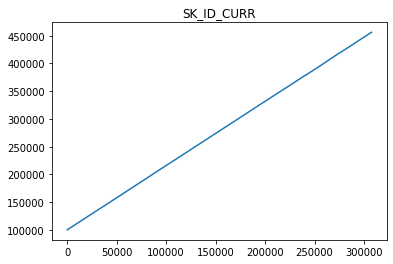

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64


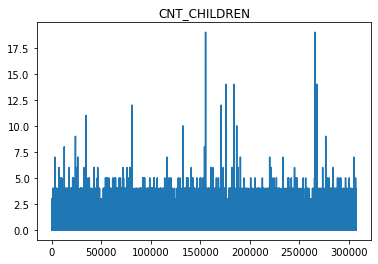

AMT_INCOME_TOTAL
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
225000.0    20698
202500.0    16341
67500.0     11147
270000.0    10827
81000.0      6001
315000.0     5862
247500.0     5344
126000.0     4668
360000.0     4115
121500.0     3848
99000.0      3633
292500.0     3418
103500.0     3330
76500.0      3146
144000.0     3123
171000.0     2647
450000.0     2435
117000.0     2390
54000.0      2319
72000.0      2187
166500.0     2053
45000.0      2043
108000.0     1946
337500.0     1790
94500.0      1747
            ...  
100300.5        1
200794.5        1
100476.0        1
200961.0        1
200997.0        1
100507.5        1
100516.5        1
50274.0         1
201127.5        1
100566.0        1
402376.5        1
100629.0        1
201267.0        1
50323.5         1
201361.5        1
100786.5        1
201658.5        1
100854.0        1
245046.6        1
201811.5        1
403650.0        1
100944.0        1
58950.0         1
101083.5   

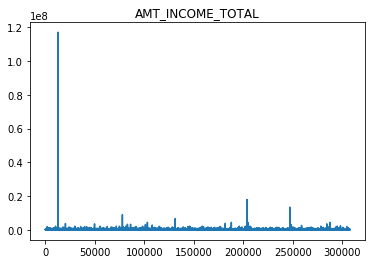

AMT_CREDIT
450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
900000.0     6246
254700.0     4500
545040.0     4437
808650.0     4152
135000.0     3660
755190.0     3524
1125000.0    3493
521280.0     3175
284400.0     3096
1078200.0    2856
454500.0     2649
1288350.0    2613
269550.0     2463
202500.0     2339
781920.0     2328
1350000.0    2321
239850.0     2084
315000.0     2072
247500.0     2057
640080.0     2041
1006920.0    1883
540000.0     1821
360000.0     1743
508495.5     1717
592560.0     1688
             ... 
1639431.0       1
1242531.0       1
1649853.0       1
618903.0        1
1114011.0       1
1650771.0       1
207504.0        1
414981.0        1
829512.0        1
829440.0        1
2116395.0       1
308475.0        1
1234741.5       1
1234863.0       1
192024.0        1
1235344.5       1
828895.5        1
1657669.5       1
1407456.0       1
828346.5        1
828216.0        1
828081.0        1
3312162.0       1
1236393.0       1

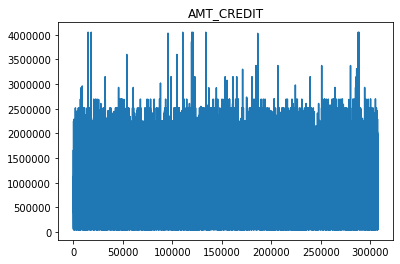

AMT_ANNUITY
9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
11250.0    1459
26217.0    1453
20250.0    1345
12375.0    1339
31653.0    1269
26640.0    1236
22500.0    1234
16875.0    1213
36459.0    1191
33025.5     938
26446.5     916
22018.5     904
23773.5     875
25537.5     836
26316.0     829
31261.5     822
21906.0     800
7875.0      741
40320.0     703
21888.0     688
32602.5     687
15750.0     684
27000.0     681
19867.5     653
33750.0     652
           ... 
71910.0       1
72949.5       1
36472.5       1
81202.5       1
40603.5       1
47205.0       1
39087.0       1
81225.0       1
49932.0       1
73003.5       1
53505.0       1
58243.5       1
73053.0       1
81049.5       1
62703.0       1
45877.5       1
56470.5       1
62383.5       1
63499.5       1
81094.5       1
73048.5       1
91732.5       1
56538.0       1
54297.0       1
81108.0       1
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_AN

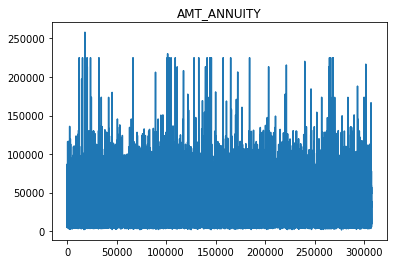

AMT_GOODS_PRICE
450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
             ...  
694152.0         1
250398.0         1
692914.5         1
346099.5         1
887949.0         1
1415259.0        1
444010.5         1
343840.5         1
686763.0         1
888061.5         1
171468.0         1
342823.5         1
443421.0         1
886770.0         1
349834.5         1
2142000.0        1
350068.5         1
350500.5         1
443182.5         1
702301.5         1
1971000.0      

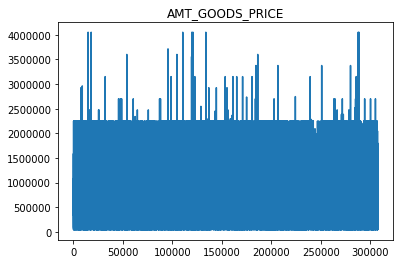

REGION_POPULATION_RELATIVE
0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0

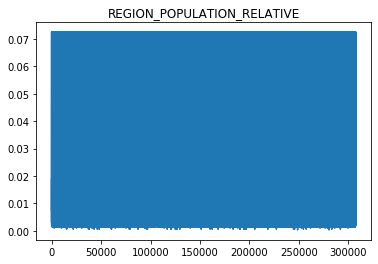

DAYS_BIRTH
-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
-10292    40
-14395    39
-14267    39
-13263    39
-11664    39
-13584    38
-15565    38
-13788    38
-13480    38
-15042    38
-13634    38
-13891    38
-14791    38
-13217    37
-15450    37
-10136    37
-20074    37
-15048    37
-16690    37
-10107    37
-15563    37
-14790    37
-14767    37
-10192    37
-14890    37
          ..
-24973     1
-25229     1
-25055     1
-25091     1
-25026     1
-25063     1
-25030     1
-24525     1
-25143     1
-25036     1
-7827      1
-16436     1
-7679      1
-8000      1
-25029     1
-24964     1
-7954      1
-24862     1
-7489      1
-25118     1
-24962     1
-25139     1
-7997      1
-16440     1
-24711     1
-25032     1
-7956      1
-8001      1
-7861      1
-24894     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64


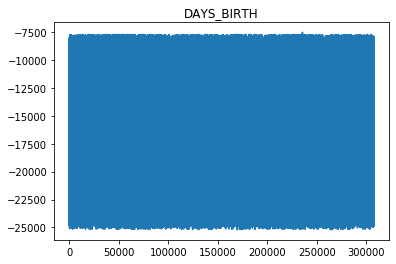

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-199         151
-230         151
-212         150
-229         143
-384         143
-231         140
-215         138
-207         138
-188         137
-216         137
-116         136
-196         136
-222         135
-193         134
-195         133
-214         132
-213         131
-254         131
-381         130
-201         130
-233         128
-185         128
-237         127
-194         127
-184         126
-234         126
-209         125
           ...  
-12768         1
-10604         1
-10857         1
-8810          1
-14955         1
-11113         1
-11369         1
-13420         1
-10346         1
-10860         1
-12649         1
-10358         1
-12650         1
-10870         1
-12919         1
-14968         1
-13175         1
-11382         1
-10101         1
-12150         1
-10603         1
-12393         1
-9694          1
-11741         1
-13162         1
-11115         1
-11371         1


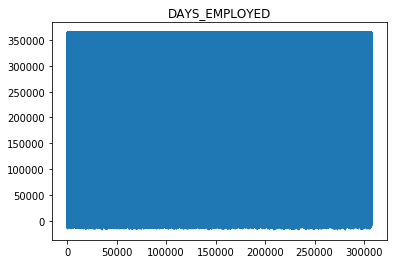

DAYS_REGISTRATION
-1.0        113
-7.0         98
-6.0         96
-2.0         92
-4.0         92
-5.0         86
-9.0         84
-3.0         84
 0.0         80
-21.0        80
-14.0        80
-10.0        79
-11.0        67
-511.0       66
-15.0        66
-8.0         65
-56.0        65
-23.0        64
-41.0        63
-621.0       63
-20.0        62
-19.0        62
-13.0        62
-34.0        62
-69.0        62
-70.0        62
-29.0        61
-812.0       61
-742.0       61
-679.0       61
           ... 
-16782.0      1
-15846.0      1
-15275.0      1
-14606.0      1
-14963.0      1
-19660.0      1
-16528.0      1
-17330.0      1
-16296.0      1
-17964.0      1
-14374.0      1
-14953.0      1
-14941.0      1
-16098.0      1
-14943.0      1
-15292.0      1
-16129.0      1
-19488.0      1
-14876.0      1
-17212.0      1
-15809.0      1
-14372.0      1
-15542.0      1
-15285.0      1
-15811.0      1
-12446.0      1
-17298.0      1
-14676.0      1
-15817.0      1
-13267.0      1
Name: 

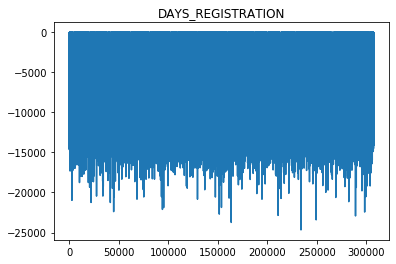

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
-4151    157
-4032    157
-4200    156
-4214    155
-4171    155
-4285    154
-4270    154
-4096    154
-4047    154
-4263    153
-4375    152
-4291    151
-4074    150
-4220    150
-4144    150
-4166    149
-4319    148
-4389    148
-4320    148
-4130    148
-4312    147
-4081    147
-4221    147
-4264    146
-4073    146
        ... 
-5826      1
-6337      1
-5960      1
-6274      1
-6162      1
-6201      1
-5868      1
-6220      1
-5652      1
-6016      1
-6086      1
-6015      1
-5862      1
-6135      1
-6028      1
-5879      1
-6211      1
-5915      1
-6212      1
-5955      1
-6074      1
-6029      1
-5913      1
-6206      1
-6117      1
-5696      1
-6073      1
-6076      1
-6176      1
-6189      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64


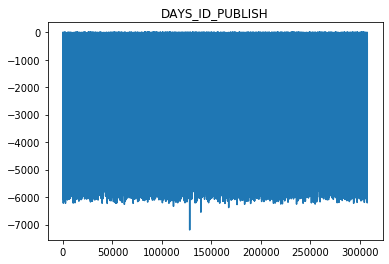

OWN_CAR_AGE
7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
4.0     5557
1.0     5280
9.0     5020
10.0    4806
14.0    4594
13.0    4566
12.0    4257
11.0    4161
5.0     3595
15.0    3580
16.0    3355
17.0    2899
64.0    2443
18.0    2418
0.0     2134
19.0    1864
20.0    1527
21.0    1462
22.0    1250
24.0    1150
23.0    1067
65.0     891
25.0     865
26.0     580
28.0     542
        ... 
30.0     326
31.0     267
32.0     208
34.0     183
35.0     157
33.0     132
36.0     124
38.0      97
40.0      85
39.0      78
37.0      75
41.0      58
42.0      42
44.0      21
43.0      19
54.0      12
45.0      11
49.0       6
46.0       5
55.0       4
51.0       3
63.0       2
91.0       2
69.0       1
48.0       1
52.0       1
56.0       1
47.0       1
50.0       1
57.0       1
Name: OWN_CAR_AGE, Length: 62, dtype: int64


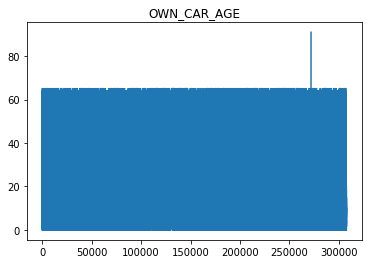

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64


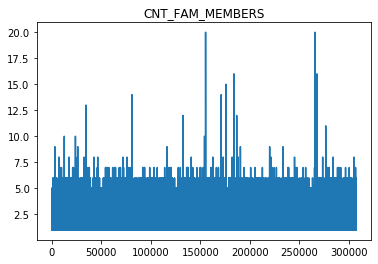

REGION_RATING_CLIENT
2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64


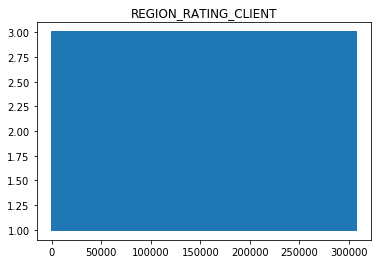

REGION_RATING_CLIENT_W_CITY
2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64


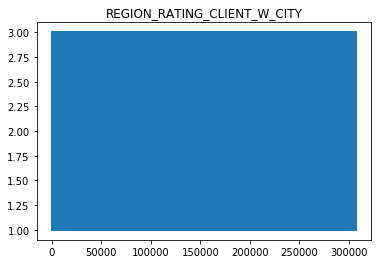

HOUR_APPR_PROCESS_START
10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64


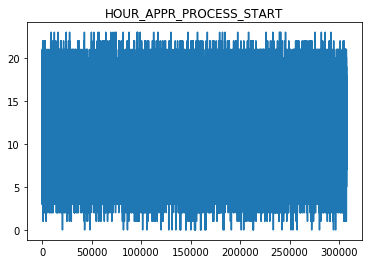

EXT_SOURCE_1
0.499002    5
0.622707    5
0.765724    5
0.443982    5
0.356323    5
0.528197    5
0.581015    5
0.605152    5
0.667740    5
0.598469    5
0.546426    5
0.528984    4
0.363791    4
0.533413    4
0.285593    4
0.551329    4
0.842690    4
0.675012    4
0.434249    4
0.342503    4
0.498151    4
0.735812    4
0.715895    4
0.555174    4
0.443195    4
0.338143    4
0.321464    4
0.690801    4
0.644323    4
0.436415    4
           ..
0.264721    1
0.086637    1
0.234493    1
0.207823    1
0.534202    1
0.278139    1
0.622173    1
0.171978    1
0.148790    1
0.493610    1
0.762491    1
0.456938    1
0.787479    1
0.184301    1
0.534150    1
0.692724    1
0.444218    1
0.470912    1
0.397486    1
0.539996    1
0.689330    1
0.700649    1
0.477169    1
0.846314    1
0.720740    1
0.241861    1
0.381263    1
0.259241    1
0.116346    1
0.844540    1
Name: EXT_SOURCE_1, Length: 114584, dtype: int64


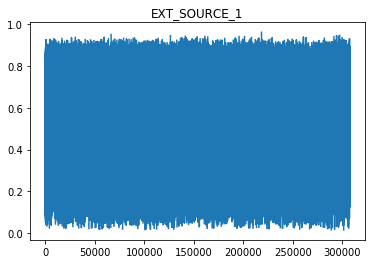

EXT_SOURCE_2
0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
0.266520    244
0.263144    243
0.162145    238
0.162192    234
0.163187    184
0.160405    173
0.191526    169
0.245350    167
0.354225    149
0.194266    140
0.192316    131
0.357282    129
0.194215    127
0.195354    123
0.355126    113
0.341123    110
0.255616     92
0.358568     90
0.293090     85
0.344191     84
0.262055     84
0.357342     81
0.254760     80
0.342028     73
0.296144     72
           ... 
0.621294      1
0.048183      1
0.431337      1
0.774998      1
0.795069      1
0.433903      1
0.067371      1
0.742777      1
0.442527      1
0.360623      1
0.457018      1
0.519864      1
0.205765      1
0.806617      1
0.275929      1
0.395266      1
0.289537      1
0.791248      1
0.116772      1
0.017752      1
0.162850      1
0.762807      1
0.278040      1
0.108404      1
0.047854      1
0.169134      1
0.213753      1
0.057994      1
0.229146      1
0.336367      1
Name: EXT_S

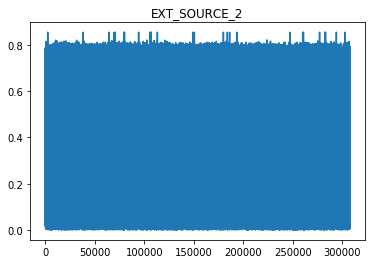

EXT_SOURCE_3
0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
0.581484    1141
0.689479    1138
0.595456    1136
0.554947    1132
0.621226    1109
0.657784    1092
0.607557    1067
0.643026    1066
0.450747    1064
0.626304    1054
0.673830    1030
0.651260    1029
0.511892    1026
0.706205     992
0.553165     984
0.593718     978
0.634706     969
0.740799     961
0.681706     959
0.565608     956
0.728141     953
0.771362     947
0.576209     943
0.586740     942
0.656158     931
            ... 
0.028674       1
0.021951       1
0.879506       1
0.019468       1
0.023225       1
0.029079       1
0.849170       1
0.013948       1
0.872456       1
0.028275       1
0.020026       1
0.024919       1
0.844493       1
0.020311       1
0.026921       1
0.016541       1
0.864212       1
0.043227       1
0.021492       1
0.018266       1
0.016078       1
0.025272       1
0.020455       1
0.896010       1
0.029283       1
0.018137       1
0.017017       1
0

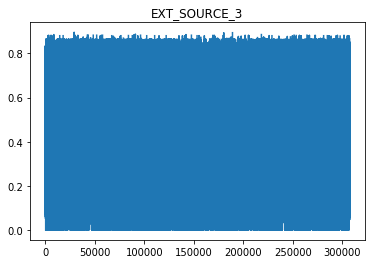

APARTMENTS_AVG
0.0825    6663
0.0619    6332
0.0928    4404
0.0722    3986
0.0082    3507
0.0165    3027
0.1031    2892
0.1485    2769
0.0124    2721
0.0742    2231
0.1237    2212
0.1113    1880
0.0186    1844
0.0247    1779
0.0660    1708
0.1227    1552
0.0495    1509
0.0412    1462
0.0371    1428
0.2227    1425
0.0773    1294
0.0278    1005
0.1856     985
0.0330     975
0.0041     942
0.0577     939
0.0990     881
0.0814     868
0.0309     855
0.0701     848
          ... 
0.0744       1
0.0101       1
0.0300       1
0.0614       1
0.6722       1
0.9021       1
0.6515       1
0.0131       1
0.0769       1
0.5552       1
0.0097       1
0.1025       1
0.1571       1
0.7979       1
0.2044       1
0.2344       1
0.1167       1
0.0971       1
0.0857       1
0.0767       1
0.2529       1
0.4611       1
0.2852       1
0.1849       1
0.9701       1
0.1987       1
0.2519       1
0.9804       1
0.1677       1
0.7608       1
Name: APARTMENTS_AVG, Length: 2339, dtype: int64


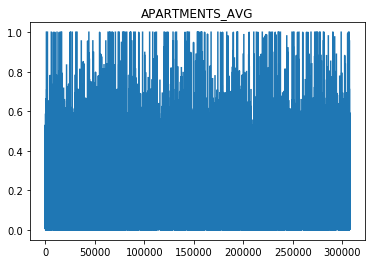

BASEMENTAREA_AVG
0.0000    14745
0.0545      251
0.0818      251
0.0727      248
0.1091      246
0.0796      245
0.0800      239
0.0805      230
0.0764      220
0.0793      211
0.0797      205
0.0655      203
0.0809      202
0.0636      201
0.1000      197
0.0795      190
0.0625      190
0.0804      189
0.0801      188
0.0785      183
0.0709      183
0.0791      180
0.0806      180
0.0627      180
0.0618      179
0.0782      177
0.0591      175
0.0909      174
0.0626      174
0.0799      174
          ...  
0.2814        1
0.3621        1
0.3564        1
0.4287        1
0.2838        1
0.3313        1
0.3710        1
0.3981        1
0.5425        1
0.3870        1
0.3127        1
0.3713        1
0.2254        1
0.7046        1
0.3598        1
0.2883        1
0.3891        1
0.3051        1
0.8789        1
0.6682        1
0.2540        1
0.3423        1
0.3204        1
0.2287        1
0.3668        1
0.4090        1
0.3593        1
0.3942        1
0.2686        1
0.4737        1
Name: B

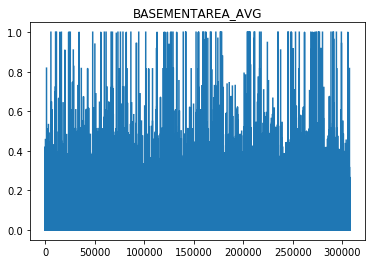

YEARS_BEGINEXPLUATATION_AVG
0.9871    4311
0.9856    4189
0.9861    4171
0.9801    4123
0.9866    4114
0.9806    4096
0.9851    4096
0.9811    3986
0.9816    3982
0.9831    3970
0.9876    3942
0.9796    3933
0.9841    3881
0.9821    3872
0.9846    3856
0.9791    3846
0.9836    3803
0.9781    3728
0.9786    3666
0.9826    3648
0.9776    3460
0.9771    3441
0.9881    3425
0.9767    3180
0.9762    3003
0.9886    2897
0.9742    2876
0.9757    2783
0.9747    2754
0.9752    2739
          ... 
0.8400       1
0.9165       1
0.4789       1
0.5315       1
0.8877       1
0.4908       1
0.8987       1
0.6408       1
0.3318       1
0.8982       1
0.0979       1
0.2290       1
0.8629       1
0.0179       1
0.0974       1
0.2156       1
0.4868       1
0.9245       1
0.8276       1
0.3289       1
0.9076       1
0.4853       1
0.4784       1
0.5857       1
0.6841       1
0.7303       1
0.9220       1
0.2380       1
0.4893       1
0.6508       1
Name: YEARS_BEGINEXPLUATATION_AVG, Length: 285, dtype: in

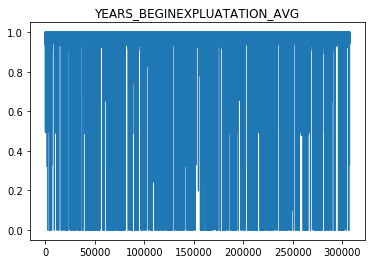

YEARS_BUILD_AVG
0.8232    2999
0.8164    2864
0.8028    2848
0.7280    2802
0.7348    2761
0.8096    2755
0.8300    2738
0.7960    2734
0.7484    2731
0.7688    2712
0.7416    2681
0.7892    2629
0.7552    2618
0.7144    2604
0.7756    2598
0.7824    2584
0.7212    2577
0.7076    2458
0.7620    2458
0.7008    2439
0.8368    2294
0.6940    2268
0.6872    2232
0.6804    2098
0.6736    1953
0.8436    1919
0.6464    1890
0.6668    1830
0.6600    1748
0.6532    1743
          ... 
0.1704       7
0.0956       6
0.1772       6
0.0752       6
0.3812       5
0.1636       5
0.1092       5
0.3540       5
0.0072       4
0.1160       4
0.0412       4
0.0684       4
0.1024       4
0.1364       4
0.0344       3
0.1432       3
0.1840       3
0.0480       3
0.0140       3
0.1296       3
0.1908       3
0.1228       3
0.0548       2
0.0004       2
0.3744       2
0.0616       2
0.1976       2
0.3676       2
0.0276       1
0.0208       1
Name: YEARS_BUILD_AVG, Length: 149, dtype: int64


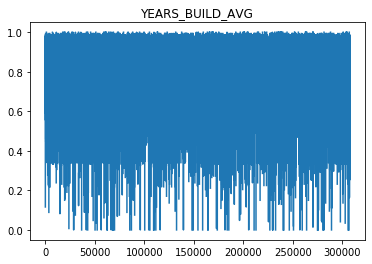

COMMONAREA_AVG
0.0000    8442
0.0079     544
0.0078     475
0.0080     446
0.0077     414
0.0086     365
0.0014     345
0.0070     343
0.0013     317
0.0069     314
0.0113     302
0.0087     293
0.0015     292
0.0085     289
0.0114     287
0.0012     287
0.0120     281
0.0094     276
0.0071     264
0.0088     256
0.0042     254
0.0016     253
0.0081     251
0.0084     247
0.0021     246
0.0118     245
0.0124     242
0.0076     241
0.0028     240
0.0017     239
          ... 
0.5007       1
0.3853       1
0.3019       1
0.2052       1
0.1719       1
0.3746       1
0.4514       1
0.4483       1
0.5378       1
0.1533       1
0.2550       1
0.3467       1
0.4401       1
0.4326       1
0.2528       1
0.2751       1
0.3576       1
0.2394       1
0.8503       1
0.1871       1
0.1722       1
0.6360       1
0.4456       1
0.2935       1
0.2361       1
0.1480       1
0.5108       1
0.3104       1
0.4891       1
0.3607       1
Name: COMMONAREA_AVG, Length: 3181, dtype: int64


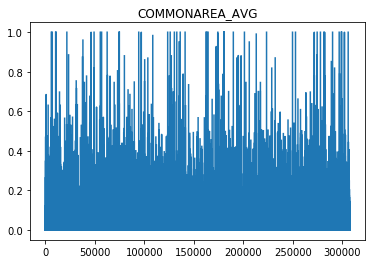

ELEVATORS_AVG
0.0000    85718
0.0800     9886
0.1600     8806
0.2400     6071
0.1200     5593
0.0400     4585
0.2000     4072
0.3200     2788
0.2800     2272
0.4000     1532
0.3600     1383
0.4800     1069
0.4400      707
0.1000      520
0.5600      483
0.6400      448
0.0600      424
0.0200      423
0.1400      369
0.5200      280
0.1800      258
0.1064      257
0.6000      248
0.1332      234
0.0532      225
0.7200      222
0.2200      221
0.0264      208
1.0000      158
0.0932      147
          ...  
0.0172        1
0.0348        1
0.2284        1
0.1084        1
0.2068        1
0.0828        1
0.6132        1
0.1648        1
0.0872        1
0.0252        1
0.0336        1
0.0472        1
0.2512        1
0.0232        1
0.0384        1
0.1640        1
0.0180        1
0.0520        1
0.0024        1
0.0936        1
0.0120        1
0.2960        1
0.1160        1
0.1664        1
0.4132        1
0.1736        1
0.1152        1
0.0216        1
0.1140        1
0.2368        1
Name: ELEV

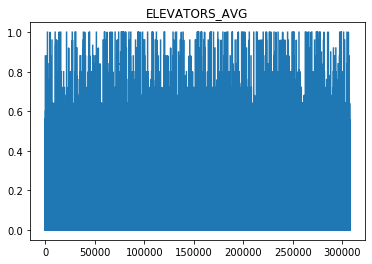

ENTRANCES_AVG
0.1379    34007
0.0690    22956
0.1034    19533
0.2069    19062
0.0345    15380
0.1724     9185
0.2759     7895
0.2414     4165
0.3448     2066
0.3103     2049
0.0862     1250
0.4138     1195
0.1207     1144
0.3793     1009
0.1552      806
0.0517      607
0.1897      554
0.4828      490
0.4483      437
0.1148      409
0.1607      393
0.0917      388
0.5517      352
0.1262      348
0.0000      323
0.2241      311
0.1493      310
0.5172      299
0.0803      296
0.1838      295
          ...  
0.1272        1
0.0676        1
0.0952        1
0.1059        1
0.1590        1
0.0821        1
0.1200        1
0.1524        1
0.0055        1
0.0400        1
0.1593        1
0.1510        1
0.1414        1
0.2010        1
0.1341        1
0.2455        1
0.0590        1
0.0393        1
0.1645        1
0.1886        1
0.0910        1
0.0369        1
0.0355        1
0.0724        1
0.3562        1
0.2145        1
0.0659        1
0.1021        1
0.0579        1
0.0493        1
Name: ENTR

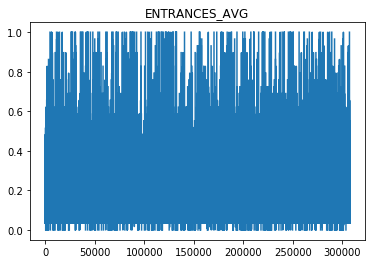

FLOORSMAX_AVG
0.1667    61875
0.3333    31909
0.0417    14600
0.3750     7926
0.1250     6974
0.0833     6586
0.0000     2938
0.4583     2828
0.6250     1915
0.5417     1685
0.2083     1673
0.2500     1624
0.6667     1497
0.2917      664
0.1042      461
0.3542      436
0.4167      433
0.2221      420
0.5833      415
0.5000      346
0.3958      342
0.1458      316
0.2708      292
0.1875      250
0.2775      241
0.4792      222
0.8750      208
0.7083      199
1.0000      167
0.2292      154
          ...  
0.3733        1
0.1725        1
0.3233        1
0.5938        1
0.0175        1
0.2200        1
0.0875        1
0.1567        1
0.2258        1
0.1379        1
0.2575        1
0.2042        1
0.1792        1
0.8471        1
0.0117        1
0.3175        1
0.8400        1
0.3512        1
0.0892        1
0.1800        1
0.2462        1
0.0779        1
0.1200        1
0.5500        1
0.6333        1
0.4758        1
0.1433        1
0.6129        1
0.0613        1
0.1608        1
Name: FLOO

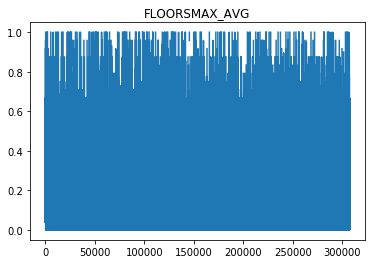

FLOORSMIN_AVG
0.2083    32875
0.3750    17845
0.0417    17776
0.0833     5086
0.4167     3961
0.1667     3537
0.1250     3336
0.0000     2320
0.5000     1688
0.6667     1194
0.7083     1007
0.5833      984
0.2500      841
0.2917      833
0.3333      382
0.2638      281
0.6250      229
0.5417      223
0.4583      212
0.3958      198
0.1458      174
0.4375      174
0.3125      158
0.1875      153
1.0000      141
0.1525      128
0.2292      126
0.9167      122
0.7500      113
0.1042      112
          ...  
0.0583        1
0.3058        1
0.2958        1
0.0458        1
0.2283        1
0.6733        1
0.5971        1
0.2058        1
0.3808        1
0.5583        1
0.4150        1
0.9025        1
0.3583        1
0.1292        1
0.3175        1
0.2862        1
0.3212        1
0.6179        1
0.1212        1
0.6500        1
0.9304        1
0.2217        1
0.2029        1
0.6333        1
0.2821        1
0.1488        1
0.3000        1
0.2388        1
0.3367        1
0.1425        1
Name: FLOO

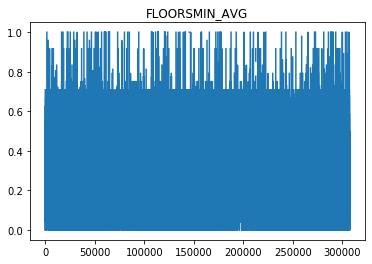

LANDAREA_AVG
0.0000    15600
0.0631      189
0.0316      187
0.0473      186
0.0174      180
0.0237      175
0.0552      173
0.0158      170
0.0331      170
0.0189      165
0.0789      165
0.0150      165
0.0139      165
0.0142      164
0.0153      162
0.0458      160
0.0536      158
0.0394      158
0.0221      157
0.0145      155
0.0286      155
0.0141      154
0.0379      152
0.0146      151
0.0252      149
0.0154      148
0.0363      147
0.0208      146
0.0156      146
0.0175      146
          ...  
0.2610        1
0.2773        1
0.4798        1
0.2511        1
0.2257        1
0.9497        1
0.3306        1
0.3389        1
0.8564        1
0.3673        1
0.2021        1
0.6195        1
0.3092        1
0.6916        1
0.5369        1
0.5454        1
0.2321        1
0.2598        1
0.2809        1
0.3519        1
0.2372        1
0.2201        1
0.2104        1
0.2546        1
0.3155        1
0.2674        1
0.6913        1
0.2749        1
0.3181        1
0.2230        1
Name: LANDA

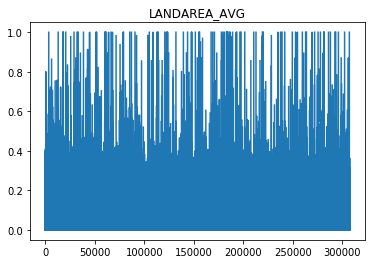

LIVINGAPARTMENTS_AVG
0.0504    4272
0.0672    4231
0.0756    2778
0.0588    2586
0.0841    1864
0.1210    1793
0.0067    1695
0.0605    1492
0.1009    1456
0.0134    1447
0.0538    1388
0.0101    1363
0.0908    1294
0.0202    1068
0.1000    1046
0.0403    1017
0.0151     987
0.0336     970
0.1816     960
0.0303     914
0.0630     848
0.0471     783
0.1513     702
0.0807     698
0.0269     681
0.1202     668
0.0572     643
0.0664     641
0.0656     637
0.0748     602
          ... 
0.3583       1
0.2415       1
0.6464       1
0.6169       1
0.4261       1
0.5968       1
0.0233       1
0.6884       1
0.3373       1
0.3299       1
0.5052       1
0.0105       1
0.5875       1
0.0455       1
0.7867       1
0.2030       1
0.0495       1
0.0039       1
0.1141       1
0.6489       1
0.1347       1
0.0314       1
0.1511       1
0.8952       1
0.7935       1
0.1108       1
0.0830       1
0.1020       1
0.0778       1
0.0788       1
Name: LIVINGAPARTMENTS_AVG, Length: 1868, dtype: int64


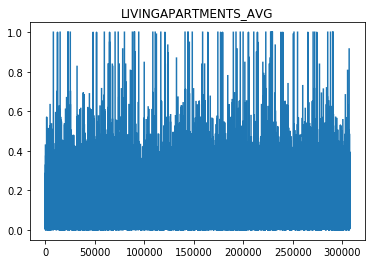

LIVINGAREA_AVG
0.0000    284
0.0512    243
0.0510    223
0.0702    223
0.0509    221
0.0538    220
0.0638    215
0.0513    210
0.0511    209
0.0626    205
0.0508    204
0.0704    203
0.0504    202
0.0126    202
0.0506    201
0.0517    199
0.0632    199
0.0081    198
0.0539    198
0.0703    198
0.0634    196
0.0628    194
0.0507    194
0.0706    193
0.0705    193
0.0514    192
0.0636    190
0.0630    190
0.0874    188
0.0635    186
         ... 
0.6167      1
0.6364      1
0.8499      1
0.3493      1
0.3819      1
0.4415      1
0.4250      1
0.4468      1
0.6493      1
0.6383      1
0.4562      1
0.4570      1
0.5469      1
0.6096      1
0.4705      1
0.9860      1
0.3584      1
0.4476      1
0.4193      1
0.4257      1
0.7770      1
0.4956      1
0.6560      1
0.7339      1
0.2840      1
0.8497      1
0.4145      1
0.3524      1
0.3694      1
0.6670      1
Name: LIVINGAREA_AVG, Length: 5199, dtype: int64


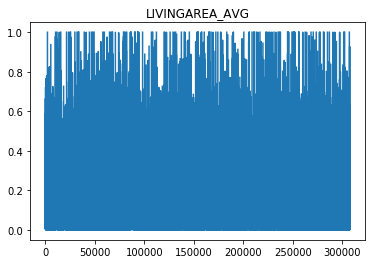

NONLIVINGAPARTMENTS_AVG
0.0000    54549
0.0039    13606
0.0077     6351
0.0116     3714
0.0154     2533
0.0193     1673
0.0019     1250
0.0232     1195
0.0270      865
0.0309      717
0.0347      526
0.0386      495
0.0058      493
0.0013      352
0.0425      311
0.0025      260
0.0463      243
0.0097      235
0.0502      197
0.0541      178
0.0579      163
0.0051      158
0.0135      156
0.0010      150
0.0695      132
0.0618      123
0.0064      119
1.0000       97
0.0174       94
0.0656       86
          ...  
0.0104        1
0.0319        1
0.7297        1
0.1757        1
0.0002        1
0.0081        1
0.0137        1
0.3745        1
0.2664        1
0.0199        1
0.6515        1
0.4981        1
0.1139        1
0.7709        1
0.8880        1
0.0111        1
0.4846        1
0.0605        1
0.4942        1
0.0782        1
0.4305        1
0.4826        1
0.1409        1
0.0007        1
0.4903        1
0.2452        1
0.6023        1
0.3629        1
0.6795        1
0.0946        1


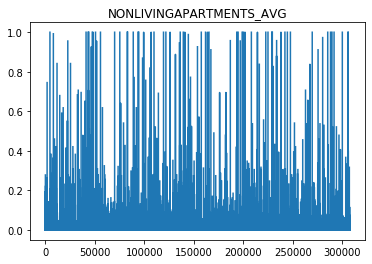

NONLIVINGAREA_AVG
0.0000    58735
0.0012      546
0.0044      454
0.0022      440
0.0031      415
0.0010      405
0.0011      405
0.0036      399
0.0030      397
0.0024      395
0.0043      393
0.0052      386
0.0037      373
0.0042      372
0.0029      369
0.0035      365
0.0053      355
0.0038      348
0.0032      346
0.0047      344
0.0021      342
0.0046      340
0.0049      336
0.0040      335
0.0013      330
0.0023      325
0.0026      321
0.0045      316
0.0051      313
0.0039      311
          ...  
0.3897        1
0.4847        1
0.5077        1
0.7216        1
0.3063        1
0.3573        1
0.2596        1
0.2035        1
0.6416        1
0.4538        1
0.3558        1
0.3996        1
0.2872        1
0.7906        1
0.1470        1
0.1702        1
0.4298        1
0.5955        1
0.2007        1
0.1897        1
0.3876        1
0.1400        1
0.2017        1
0.3982        1
0.2955        1
0.6440        1
0.2855        1
0.3042        1
0.2478        1
0.2498        1
Name: 

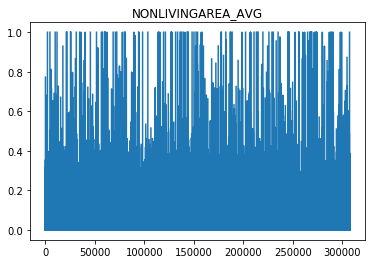

APARTMENTS_MODE
0.0840    7522
0.0630    7451
0.0945    4757
0.0735    4388
0.0084    3970
0.0168    3324
0.1050    3116
0.1513    3039
0.0126    3034
0.0756    2973
0.1261    2372
0.1134    2154
0.0189    1960
0.0252    1951
0.0672    1838
0.0420    1785
0.0378    1741
0.0504    1718
0.1250    1658
0.2269    1500
0.0788    1325
0.0315    1148
0.0336    1121
0.0284    1101
0.0588    1072
0.0042    1069
0.1891    1033
0.0021    1006
0.0000     976
0.0830     974
          ... 
0.7574       1
0.7752       1
0.7363       1
0.8487       1
0.7101       1
0.8372       1
0.6817       1
0.9989       1
0.9223       1
0.5473       1
0.7626       1
0.8361       1
0.9580       1
0.9853       1
0.9832       1
0.7458       1
0.9622       1
0.5116       1
0.9002       1
0.7489       1
0.7300       1
0.8130       1
0.8309       1
0.5105       1
0.7164       1
0.8445       1
0.8971       1
0.5945       1
0.8676       1
0.7532       1
Name: APARTMENTS_MODE, Length: 760, dtype: int64


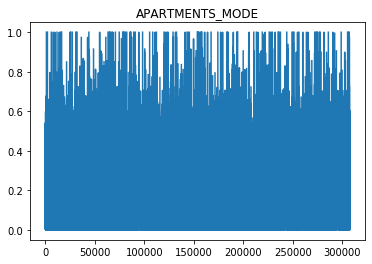

BASEMENTAREA_MODE
0.0000    16598
0.0566      269
0.0849      265
0.0642      253
0.0830      251
0.1132      243
0.0792      241
0.0826      238
0.0679      222
0.0755      215
0.0840      208
0.0660      205
0.1038      205
0.0823      199
0.0425      199
0.0858      191
0.0613      190
0.0828      186
0.0651      185
0.0825      184
0.0836      181
0.0736      181
0.0827      175
0.0835      174
0.0834      173
0.0811      173
0.0821      173
0.0585      173
0.0647      169
0.0943      169
          ...  
0.2399        1
0.3026        1
0.2960        1
0.5396        1
0.7753        1
0.7547        1
0.4087        1
0.3613        1
0.2701        1
0.3367        1
0.3946        1
0.4321        1
0.2364        1
0.2726        1
0.2742        1
0.3503        1
0.3424        1
0.3213        1
0.3178        1
0.4449        1
0.2861        1
0.3677        1
0.3002        1
0.4272        1
0.4906        1
0.3863        1
0.3144        1
0.3315        1
0.2876        1
0.3351        1
Name: 

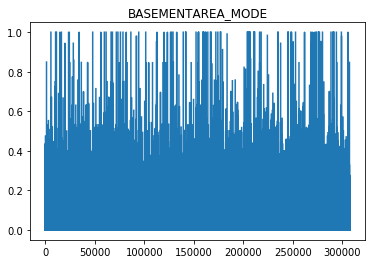

YEARS_BEGINEXPLUATATION_MODE
0.9871    4291
0.9866    4173
0.9861    4167
0.9801    4110
0.9806    4083
0.9856    4075
0.9851    4016
0.9816    3976
0.9796    3974
0.9791    3935
0.9831    3904
0.9876    3892
0.9782    3808
0.9821    3794
0.9841    3791
0.9811    3790
0.9846    3785
0.9786    3689
0.9836    3669
0.9826    3625
0.9777    3581
0.9772    3513
0.9881    3319
0.9767    3300
0.9762    3077
0.9742    2991
0.9747    2874
0.9737    2861
0.9757    2833
0.9752    2827
          ... 
0.4518       1
0.4359       1
0.0973       1
0.9101       1
0.9220       1
0.0983       1
0.9141       1
0.9191       1
0.8992       1
0.8987       1
0.8982       1
0.0978       1
0.9166       1
0.8818       1
0.8967       1
0.8823       1
0.8972       1
0.0452       1
0.8580       1
0.8878       1
0.8937       1
0.9037       1
0.8853       1
0.8222       1
0.8833       1
0.8421       1
0.9057       1
0.7433       1
0.9176       1
0.5318       1
Name: YEARS_BEGINEXPLUATATION_MODE, Length: 221, dtype: 

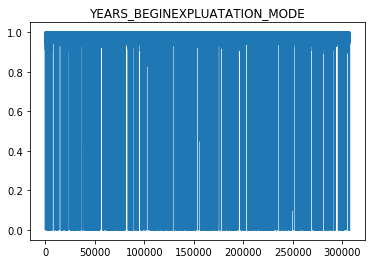

YEARS_BUILD_MODE
0.8301    2960
0.8236    2879
0.7387    2789
0.8171    2763
0.8105    2755
0.7452    2737
0.8367    2711
0.8040    2707
0.7583    2704
0.7779    2689
0.7256    2645
0.7321    2626
0.7517    2597
0.7975    2579
0.7909    2547
0.7844    2541
0.7125    2529
0.7648    2525
0.7190    2485
0.7713    2424
0.7060    2353
0.6994    2307
0.8432    2225
0.6929    2188
0.6864    2002
0.6602    1956
0.6798    1879
0.8497    1870
0.6668    1825
0.6733    1806
          ... 
0.2225       5
0.0787       5
0.1441       5
0.1114       5
0.1049       4
0.0526       4
0.1375       4
0.1964       3
0.4054       3
0.1768       3
0.0461       3
0.1637       3
0.1571       3
0.2160       3
0.3989       3
0.0003       3
0.1506       3
0.0722       3
0.0265       2
0.2290       2
0.0395       2
0.0134       2
0.3924       2
0.0199       2
0.0853       2
0.0918       2
0.0591       1
0.0330       1
0.0657       1
0.0983       1
Name: YEARS_BUILD_MODE, Length: 154, dtype: int64


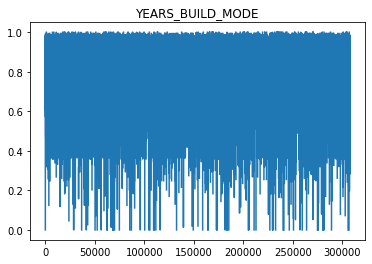

COMMONAREA_MODE
0.0000    9690
0.0080     546
0.0079     543
0.0078     518
0.0081     416
0.0087     397
0.0014     394
0.0070     363
0.0071     341
0.0012     332
0.0088     326
0.0114     315
0.0016     314
0.0086     297
0.0013     295
0.0121     295
0.0115     289
0.0089     287
0.0021     277
0.0095     276
0.0042     273
0.0028     273
0.0072     271
0.0077     270
0.0076     270
0.0035     267
0.0096     264
0.0017     263
0.0085     261
0.0069     261
          ... 
0.7147       1
0.2586       1
0.8085       1
0.3195       1
0.5052       1
0.1474       1
0.4739       1
0.2294       1
0.2445       1
0.4211       1
0.3539       1
0.6490       1
0.3044       1
0.3780       1
0.2468       1
0.3390       1
0.3243       1
0.1636       1
0.2007       1
0.2970       1
0.1828       1
0.2751       1
0.1446       1
0.2803       1
0.3029       1
0.3897       1
0.4423       1
0.4627       1
0.5271       1
0.1980       1
Name: COMMONAREA_MODE, Length: 3128, dtype: int64


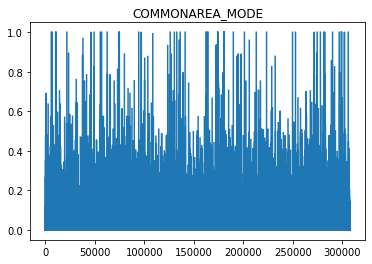

ELEVATORS_MODE
0.0000    89498
0.0806    11629
0.1611     9675
0.2417     6379
0.1208     5734
0.0403     4876
0.2014     3962
0.3222     2887
0.2820     2135
0.4028     1554
0.3625     1308
0.4834     1094
0.4431      628
0.5639      491
0.6445      447
0.5236      253
0.6042      226
0.7250      219
1.0000      144
0.8056      137
0.6848       99
0.9667       87
0.8862       66
0.7653       38
0.8459       34
0.9264       20
Name: ELEVATORS_MODE, dtype: int64


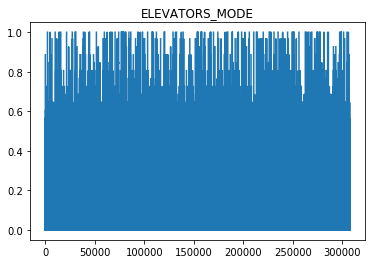

ENTRANCES_MODE
0.1379    36041
0.0690    26704
0.1034    20533
0.2069    19678
0.0345    19428
0.1724     8986
0.2759     8036
0.2414     4013
0.3448     2046
0.3103     2014
0.4138     1212
0.3793      977
0.4828      500
0.4483      431
0.0000      387
0.5517      351
0.5172      301
0.6207      241
0.5862      186
1.0000      152
0.6897      116
0.6552       65
0.8966       52
0.7586       48
0.7241       44
0.8276       42
0.7931       39
0.9655       25
0.9310       21
0.8621       14
Name: ENTRANCES_MODE, dtype: int64


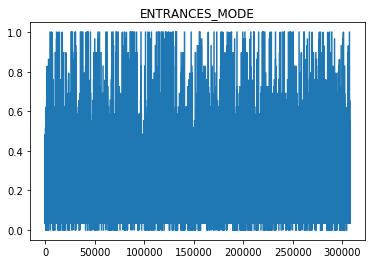

FLOORSMAX_MODE
0.1667    65550
0.3333    34373
0.0417    15616
0.3750     8321
0.1250     7267
0.0833     6785
0.0000     3415
0.4583     3216
0.6250     2075
0.5417     1836
0.6667     1710
0.2083     1505
0.2500      572
0.2917      511
0.5833      391
0.4167      236
0.8750      229
0.7083      199
0.5000      184
1.0000      164
0.7500      124
0.9583       94
0.7917       58
0.9167       38
0.8333       22
Name: FLOORSMAX_MODE, dtype: int64


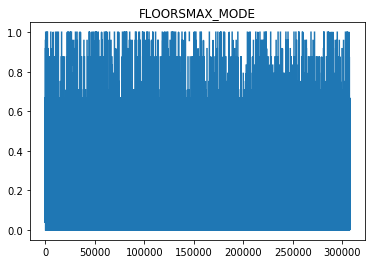

FLOORSMIN_MODE
0.2083    34403
0.3750    19042
0.0417    18917
0.0833     5349
0.4167     4105
0.1667     3636
0.1250     3170
0.0000     2517
0.5000     1889
0.6667     1264
0.7083     1143
0.5833     1051
0.2500      772
0.2917      359
0.3333      320
0.6250      207
1.0000      141
0.5417      140
0.9167      131
0.4583      105
0.7500       99
0.7917       61
0.8333       22
0.9583       17
0.8750        9
Name: FLOORSMIN_MODE, dtype: int64


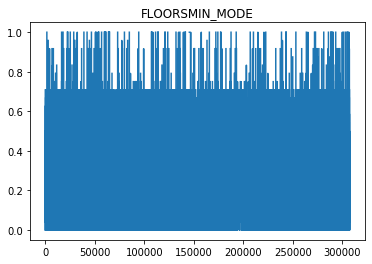

LANDAREA_MODE
0.0000    17453
0.0194      208
0.0645      193
0.0484      192
0.0323      188
0.0147      178
0.0111      175
0.0144      175
0.0258      173
0.0242      172
0.0145      171
0.0141      167
0.0807      167
0.0179      167
0.0339      166
0.0152      166
0.0565      165
0.0290      161
0.0155      161
0.0403      160
0.0452      159
0.0532      158
0.0148      157
0.0387      156
0.0180      155
0.0142      155
0.0266      152
0.0149      151
0.0269      150
0.0182      150
          ...  
0.2895        1
0.6872        1
0.2854        1
0.3498        1
0.6235        1
0.1887        1
0.2398        1
0.2913        1
0.4708        1
0.3203        1
0.8149        1
0.2261        1
0.2978        1
0.4273        1
0.3210        1
0.2170        1
0.2896        1
0.3197        1
0.3658        1
0.3778        1
0.3923        1
0.2646        1
0.2969        1
0.6096        1
0.6453        1
0.3699        1
0.3600        1
0.2922        1
0.4341        1
0.3554        1
Name: LAND

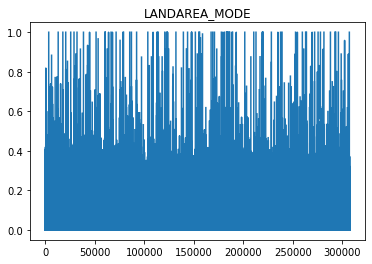

LIVINGAPARTMENTS_MODE
0.0551    4931
0.0735    4797
0.0826    2966
0.0643    2853
0.0918    2069
0.1322    1972
0.0661    1930
0.0073    1883
0.0147    1585
0.0588    1519
0.1102    1511
0.0110    1496
0.0992    1444
0.0220    1183
0.0367    1151
0.0441    1140
0.1093    1096
0.0331    1063
0.0165    1052
0.1983     972
0.0689     878
0.0514     861
0.0294     774
0.0882     762
0.1313     761
0.1653     753
0.0725     733
0.0275     697
0.0624     686
0.0716     671
          ... 
0.5941       1
0.8549       1
0.7337       1
0.7787       1
0.7062       1
0.4977       1
0.7925       1
0.6575       1
0.6290       1
0.9826       1
0.5344       1
0.7080       1
0.6584       1
0.5849       1
0.6740       1
0.6419       1
0.5914       1
0.8375       1
0.8641       1
0.6198       1
0.6189       1
0.6520       1
0.7521       1
0.5638       1
0.6768       1
0.5969       1
0.6042       1
0.6869       1
0.6244       1
0.5519       1
Name: LIVINGAPARTMENTS_MODE, Length: 736, dtype: int64


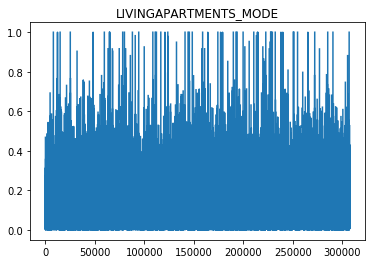

LIVINGAREA_MODE
0.0000    444
0.0530    272
0.0532    262
0.0529    249
0.0533    242
0.0561    224
0.0656    224
0.0734    223
0.0536    222
0.0525    220
0.0731    219
0.0534    215
0.0531    212
0.0662    212
0.0539    209
0.0560    207
0.0736    203
0.0535    202
0.0559    201
0.0528    198
0.0562    198
0.0726    196
0.0911    193
0.0733    193
0.0537    192
0.0085    192
0.0661    192
0.0729    191
0.0652    191
0.0735    189
         ... 
0.4152      1
0.4336      1
0.6740      1
0.6835      1
0.4022      1
0.6351      1
0.5641      1
0.4649      1
0.4361      1
0.4565      1
0.5348      1
0.4175      1
0.5529      1
0.4084      1
0.5184      1
0.8095      1
0.4699      1
0.4277      1
0.8942      1
0.8247      1
0.3589      1
0.5388      1
0.4101      1
0.5340      1
0.6386      1
0.4844      1
0.5606      1
0.7897      1
0.5616      1
0.6665      1
Name: LIVINGAREA_MODE, Length: 5301, dtype: int64


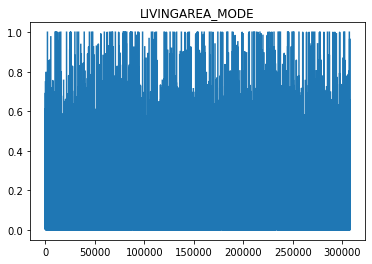

NONLIVINGAPARTMENTS_MODE
0.0000    59255
0.0039    14105
0.0078     6413
0.0117     3675
0.0156     2492
0.0195     1653
0.0233     1177
0.0272      840
0.0311      711
0.0350      527
0.0389      494
0.0428      289
0.0467      245
0.0506      194
0.0545      176
0.0584      160
0.0700      130
0.0623      127
1.0000      100
0.0661       73
0.0778       70
0.0934       63
0.0817       53
0.0856       45
0.0739       43
0.1089       37
0.0895       37
0.1012       34
0.0973       33
0.1556       31
          ...  
0.5447        2
0.3658        1
0.5837        1
0.8872        1
0.8949        1
0.5136        1
0.4708        1
0.6304        1
0.4864        1
0.2451        1
0.5019        1
0.5953        1
0.3463        1
0.4942        1
0.7082        1
0.4981        1
0.7354        1
0.6848        1
0.4319        1
0.6654        1
0.9961        1
0.8327        1
0.8288        1
0.6887        1
0.5058        1
0.6342        1
0.8911        1
0.6070        1
0.7626        1
0.3774        1

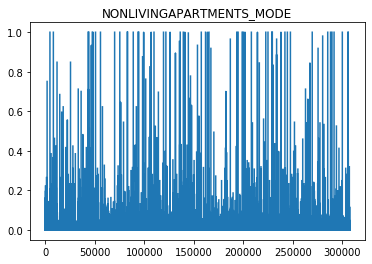

NONLIVINGAREA_MODE
0.0000    67126
0.0011      477
0.0046      466
0.0033      430
0.0012      427
0.0023      426
0.0013      410
0.0030      370
0.0055      363
0.0037      357
0.0032      349
0.0039      348
0.0045      348
0.0038      345
0.0056      338
0.0047      338
0.0040      327
0.0026      326
0.0044      309
0.0025      306
0.0027      304
0.0049      300
0.0031      297
0.0014      294
0.0010      293
0.0048      292
0.0050      291
0.0024      289
0.0052      282
0.0034      277
          ...  
0.1731        1
0.5088        1
0.2050        1
0.2327        1
0.2007        1
0.2313        1
0.2335        1
0.4442        1
0.2362        1
0.2541        1
0.4332        1
0.3343        1
0.2326        1
0.3073        1
0.7353        1
0.3496        1
0.2904        1
0.4042        1
0.2783        1
0.4961        1
0.4466        1
0.3927        1
0.1453        1
0.2550        1
0.3532        1
0.3167        1
0.8592        1
0.4457        1
0.7801        1
0.3147        1
Name:

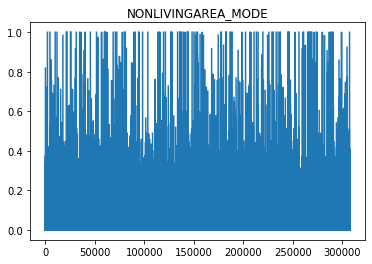

APARTMENTS_MEDI
0.0833    7109
0.0625    6687
0.0937    4622
0.0729    4211
0.0083    3562
0.0167    3098
0.1041    3097
0.1499    2992
0.0125    2801
0.0749    2559
0.1249    2315
0.1124    2083
0.0187    1865
0.0250    1824
0.0666    1778
0.1239    1649
0.0500    1564
0.0416    1548
0.0375    1487
0.2248    1487
0.0781    1373
0.0281    1034
0.1874    1024
0.0333    1011
0.0583     969
0.0042     967
0.0999     933
0.0312     916
0.0822     910
0.1489     874
          ... 
0.9108       1
0.7463       1
0.7276       1
0.6891       1
0.6943       1
0.7297       1
0.5892       1
0.8057       1
0.6048       1
0.9899       1
0.2191       1
0.4086       1
0.7505       1
0.7838       1
0.1941       1
0.9753       1
0.2743       1
0.7234       1
0.9743       1
0.3159       1
0.8712       1
0.7724       1
0.8234       1
0.9098       1
0.6225       1
0.7026       1
0.2326       1
0.7390       1
0.9160       1
0.8317       1
Name: APARTMENTS_MEDI, Length: 1148, dtype: int64


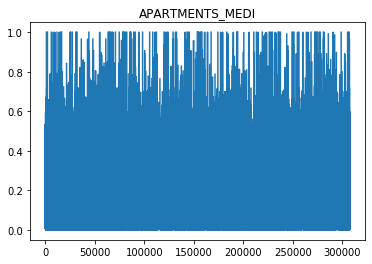

BASEMENTAREA_MEDI
0.0000    14991
0.0818      271
0.1091      266
0.0545      265
0.0727      248
0.0796      246
0.0800      240
0.0805      234
0.0655      221
0.0636      209
0.0797      209
0.0764      207
0.1000      207
0.0809      202
0.0625      199
0.0782      197
0.0795      196
0.0591      195
0.0801      191
0.0793      190
0.0785      188
0.0791      186
0.0709      184
0.0803      184
0.0564      184
0.0618      183
0.0627      183
0.0804      183
0.0806      181
0.0626      174
          ...  
0.3619        1
0.4412        1
0.4564        1
0.5563        1
0.2949        1
0.6223        1
0.2758        1
0.5813        1
0.2399        1
0.5490        1
0.2869        1
0.2707        1
0.4047        1
0.2609        1
0.5534        1
0.2595        1
0.3552        1
0.2449        1
0.2860        1
0.4860        1
0.3662        1
0.4172        1
0.4501        1
0.4461        1
0.5043        1
0.2983        1
0.4633        1
0.4724        1
0.9125        1
0.2919        1
Name: 

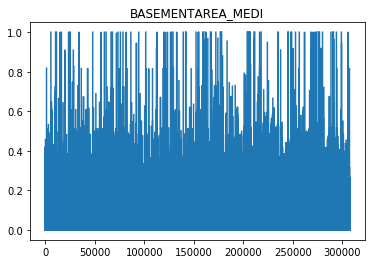

YEARS_BEGINEXPLUATATION_MEDI
0.9871    4314
0.9861    4247
0.9856    4199
0.9866    4138
0.9801    4115
0.9806    4069
0.9851    4032
0.9796    3963
0.9876    3948
0.9816    3930
0.9831    3919
0.9811    3899
0.9791    3889
0.9841    3860
0.9821    3837
0.9846    3830
0.9781    3753
0.9836    3709
0.9826    3697
0.9786    3679
0.9776    3478
0.9771    3464
0.9881    3416
0.9767    3189
0.9762    3044
0.9742    2920
0.9886    2823
0.9757    2814
0.9747    2774
0.9737    2751
          ... 
0.9165       1
0.9190       1
0.4789       1
0.8276       1
0.9175       1
0.8977       1
0.9076       1
0.9245       1
0.4853       1
0.4784       1
0.4893       1
0.9220       1
0.8877       1
0.0974       1
0.4774       1
0.0179       1
0.8629       1
0.8852       1
0.0979       1
0.8982       1
0.8987       1
0.4908       1
0.6841       1
0.4938       1
0.9056       1
0.8967       1
0.9101       1
0.4873       1
0.9091       1
0.8818       1
Name: YEARS_BEGINEXPLUATATION_MEDI, Length: 245, dtype: 

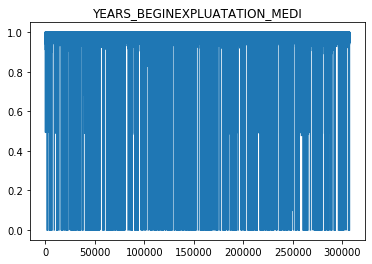

YEARS_BUILD_MEDI
0.8256    2994
0.8189    2883
0.8054    2842
0.7316    2799
0.8121    2784
0.8323    2740
0.7383    2739
0.7987    2700
0.7518    2687
0.7719    2686
0.7451    2642
0.7182    2599
0.7249    2592
0.7920    2591
0.7786    2585
0.7853    2585
0.7585    2578
0.7652    2484
0.7048    2474
0.7115    2466
0.8390    2287
0.6981    2278
0.6914    2254
0.6847    2109
0.6780    1965
0.6511    1906
0.8457    1895
0.6713    1852
0.6578    1758
0.6645    1754
          ... 
0.1077       6
0.1882       5
0.3626       5
0.1211       5
0.1748       5
0.3895       5
0.0809       4
0.1144       4
0.0540       4
0.1479       4
0.1547       3
0.0272       3
0.0473       3
0.1345       3
0.0205       3
0.1949       3
0.2016       3
0.1412       3
0.0138       2
0.1278       2
0.0003       2
0.3761       2
0.0741       2
0.0674       2
0.0607       2
0.3828       2
0.2083       2
0.0339       1
0.0406       1
0.0071       1
Name: YEARS_BUILD_MEDI, Length: 151, dtype: int64


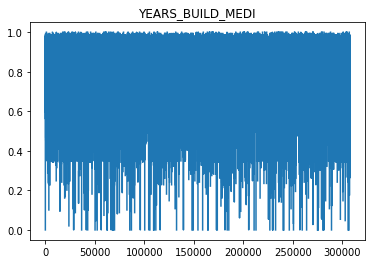

COMMONAREA_MEDI
0.0000    8691
0.0079     581
0.0080     486
0.0078     481
0.0014     377
0.0086     376
0.0081     337
0.0071     336
0.0087     309
0.0012     308
0.0070     304
0.0077     296
0.0114     295
0.0013     291
0.0121     290
0.0088     279
0.0085     275
0.0016     268
0.0095     267
0.0115     265
0.0028     262
0.0042     259
0.0021     258
0.0017     257
0.0113     257
0.0089     254
0.0015     254
0.0082     251
0.0069     250
0.0035     248
          ... 
0.2007       1
0.5410       1
0.2971       1
0.2311       1
0.5740       1
0.2084       1
0.2555       1
0.1601       1
0.4861       1
0.3896       1
0.2154       1
0.3234       1
0.3043       1
0.3496       1
0.2420       1
0.2783       1
0.1634       1
0.5967       1
0.1571       1
0.2982       1
0.2798       1
0.2014       1
0.3837       1
0.1470       1
0.3080       1
0.7109       1
0.2660       1
0.7736       1
0.8911       1
0.1534       1
Name: COMMONAREA_MEDI, Length: 3202, dtype: int64


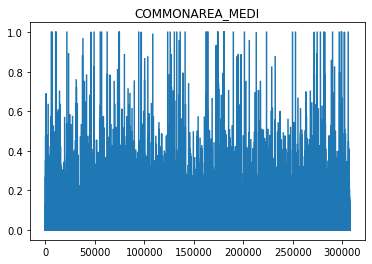

ELEVATORS_MEDI
0.00    87026
0.08    10832
0.16     9278
0.24     6392
0.12     5946
0.04     4852
0.20     4162
0.32     2937
0.28     2317
0.40     1604
0.36     1405
0.48     1096
0.44      715
0.10      543
0.56      493
0.64      454
0.06      388
0.14      388
0.02      368
0.52      290
0.18      280
0.60      248
0.22      226
0.72      224
1.00      158
0.26      145
0.80      140
0.68      112
0.30       94
0.96       81
0.34       80
0.88       68
0.38       62
0.76       45
0.84       32
0.42       32
0.46       23
0.92       20
0.50       16
0.54       10
0.78       10
0.58        6
0.90        6
0.74        6
0.66        5
0.62        5
Name: ELEVATORS_MEDI, dtype: int64


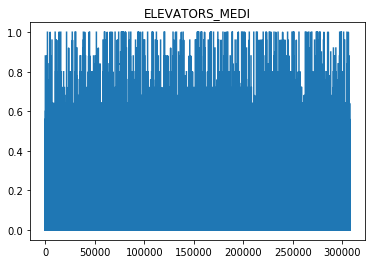

ENTRANCES_MEDI
0.1379    35535
0.0690    24193
0.1034    20492
0.2069    19750
0.0345    16150
0.1724     9566
0.2759     8048
0.2414     4318
0.3448     2108
0.3103     2086
0.0862     1352
0.1207     1228
0.4138     1198
0.3793     1010
0.1552      788
0.0517      611
0.1897      554
0.4828      503
0.4483      438
0.5517      352
0.0000      329
0.5172      304
0.2241      278
0.6207      241
0.5862      187
0.2586      169
1.0000      153
0.6897      116
0.2931      106
0.6552       68
0.3276       59
0.8966       52
0.7586       48
0.7241       44
0.8276       42
0.7931       39
0.3621       39
0.4310       31
0.9655       25
0.9310       21
0.8621       14
0.3966       14
0.4655       12
0.0172        7
0.5690        4
0.5000        1
Name: ENTRANCES_MEDI, dtype: int64


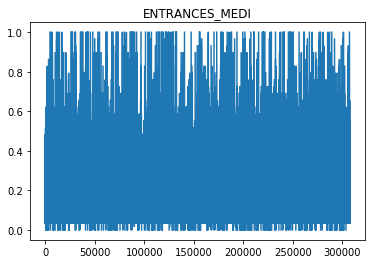

FLOORSMAX_MEDI
0.1667    63607
0.3333    33279
0.0417    14832
0.3750     8207
0.1250     7079
0.0833     6657
0.4583     3089
0.0000     2995
0.6250     2042
0.5417     1860
0.2500     1684
0.6667     1675
0.2083     1544
0.2917      567
0.1042      460
0.3542      459
0.5833      439
0.3958      346
0.4167      329
0.1458      321
0.5000      312
0.2708      291
0.1875      245
0.8750      223
0.4792      220
0.7083      204
1.0000      170
0.4375      138
0.7500      136
0.0625      132
0.3125      131
0.2292      128
0.0208      126
0.6042      115
0.9583       95
0.7917       61
0.5208       47
0.5625       46
0.8333       39
0.9167       37
0.6458       30
0.7708       27
0.6875       24
0.8125       23
0.7292       10
0.9375        4
0.8542        3
0.8958        2
0.9792        1
Name: FLOORSMAX_MEDI, dtype: int64


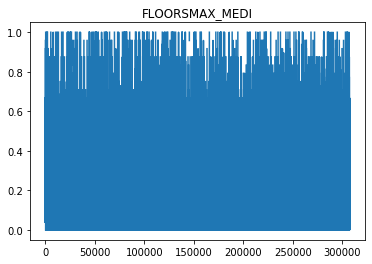

FLOORSMIN_MEDI
0.2083    33737
0.3750    18538
0.0417    18090
0.0833     5131
0.4167     4068
0.1667     3570
0.1250     3373
0.0000     2351
0.5000     1835
0.6667     1261
0.7083     1108
0.5833     1057
0.2917      852
0.2500      779
0.3333      341
0.6250      235
0.5417      212
0.3958      205
0.4375      186
0.1458      180
0.1875      159
0.4583      154
0.3125      148
1.0000      147
0.9167      130
0.2292      121
0.7500      116
0.1042      106
0.2708      104
0.5208       81
0.3542       79
0.7917       64
0.4792       61
0.0625       51
0.0208       50
0.6458       49
0.8333       27
0.5625       19
0.6042       16
0.8750       16
0.9583       14
0.8125       12
0.7292       10
0.6875        9
0.7708        7
0.9792        5
0.8542        5
Name: FLOORSMIN_MEDI, dtype: int64


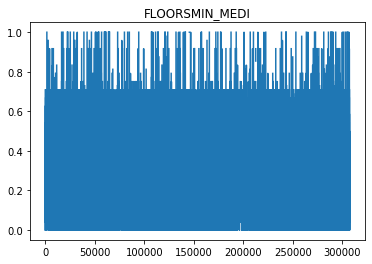

LANDAREA_MEDI
0.0000    15919
0.0193      197
0.0642      194
0.0482      186
0.0161      180
0.0143      180
0.0803      179
0.0241      177
0.0321      176
0.0178      175
0.0152      168
0.0385      167
0.0562      165
0.0154      164
0.0177      163
0.0146      162
0.0337      159
0.0156      157
0.0401      156
0.0141      155
0.0148      154
0.0169      149
0.0449      147
0.0417      147
0.0186      146
0.0230      146
0.0200      146
0.0144      146
0.0225      145
0.0291      145
          ...  
0.3477        1
0.2413        1
0.2029        1
0.5296        1
0.4208        1
0.2914        1
0.3186        1
0.1877        1
0.3057        1
0.3424        1
0.3457        1
0.2775        1
0.4841        1
0.8036        1
0.3025        1
0.2442        1
0.3062        1
0.2684        1
0.3175        1
0.2253        1
0.3968        1
0.4552        1
0.3076        1
0.2825        1
0.4126        1
0.3545        1
0.4450        1
0.4782        1
0.3136        1
0.6064        1
Name: LAND

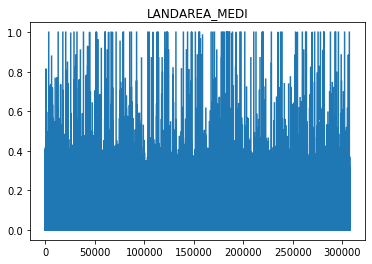

LIVINGAPARTMENTS_MEDI
0.0513    4500
0.0684    4497
0.0770    2926
0.0599    2708
0.0855    2014
0.1231    1921
0.0068    1715
0.0616    1691
0.1026    1517
0.0137    1487
0.0547    1435
0.0103    1413
0.0923    1365
0.0205    1088
0.1018    1073
0.0410    1033
0.0342    1006
0.0154    1001
0.1847     983
0.0308     939
0.0641     890
0.0479     788
0.1223     729
0.0821     726
0.1539     723
0.0274     700
0.0676     668
0.0581     652
0.0667     646
0.0761     625
          ... 
0.3801       1
0.5532       1
0.3882       1
0.2424       1
0.6832       1
0.9090       1
0.7003       1
0.8876       1
0.6105       1
0.3228       1
0.2065       1
0.4207       1
0.4485       1
0.5276       1
0.7961       1
0.3271       1
0.1663       1
0.3732       1
0.4635       1
0.5575       1
0.8354       1
0.3356       1
0.6618       1
0.5156       1
0.5857       1
0.6328       1
0.1706       1
0.1791       1
0.8183       1
0.6396       1
Name: LIVINGAPARTMENTS_MEDI, Length: 1097, dtype: int64


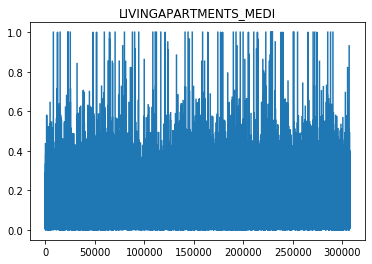

LIVINGAREA_MEDI
0.0000    299
0.0548    239
0.0518    234
0.0520    233
0.0521    232
0.0522    225
0.0519    217
0.0513    217
0.0888    212
0.0718    212
0.0717    212
0.0715    209
0.0524    207
0.0643    207
0.0714    206
0.0517    206
0.0641    205
0.0649    205
0.0719    203
0.0516    201
0.0779    198
0.0647    197
0.0645    197
0.0549    196
0.0515    195
0.0642    193
0.0636    193
0.0639    191
0.0716    190
0.0525    190
         ... 
0.4098      1
0.8733      1
0.2710      1
0.4018      1
0.5761      1
0.4883      1
0.6591      1
0.4668      1
0.4971      1
0.4604      1
0.6648      1
0.3425      1
0.4561      1
0.4767      1
0.6053      1
0.7927      1
0.3297      1
0.4207      1
0.3910      1
0.3670      1
0.4300      1
0.3490      1
0.8092      1
0.6722      1
0.4462      1
0.4183      1
0.6305      1
0.5266      1
0.3131      1
0.5239      1
Name: LIVINGAREA_MEDI, Length: 5281, dtype: int64


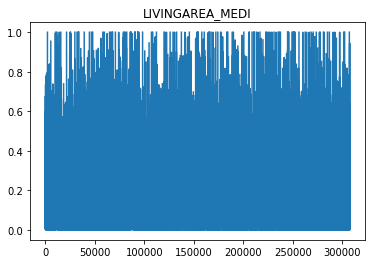

NONLIVINGAPARTMENTS_MEDI
0.0000    56097
0.0039    14126
0.0078     6493
0.0116     3788
0.0155     2557
0.0194     1696
0.0019     1286
0.0233     1202
0.0272      864
0.0311      731
0.0349      536
0.0058      515
0.0388      508
0.0427      297
0.0097      265
0.0466      259
0.0505      205
0.0543      176
0.0582      166
0.0136      150
0.0699      134
0.0621      126
0.0175       97
1.0000       97
0.0660       78
0.0776       74
0.0214       66
0.0932       63
0.0252       60
0.0815       53
          ...  
0.5939        1
0.4930        1
0.8268        1
0.2678        1
0.5823        1
0.5046        1
0.2465        1
0.4697        1
0.5008        1
0.2814        1
0.4852        1
0.1417        1
0.1145        1
0.4969        1
0.1262        1
0.5959        1
0.3765        1
0.6638        1
0.6289        1
0.8851        1
0.8307        1
0.7337        1
0.6056        1
0.8928        1
0.6832        1
0.8890        1
0.4328        1
0.3649        1
0.3513        1
0.7065        1

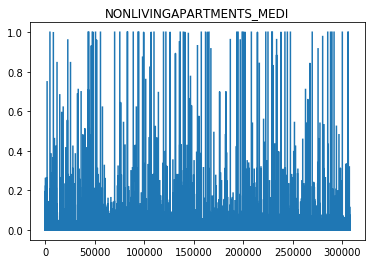

NONLIVINGAREA_MEDI
0.0000    60954
0.0012      539
0.0022      478
0.0037      456
0.0044      431
0.0011      421
0.0043      415
0.0031      407
0.0010      401
0.0029      387
0.0045      381
0.0032      375
0.0036      372
0.0023      371
0.0054      370
0.0053      366
0.0013      360
0.0025      353
0.0039      347
0.0030      339
0.0048      335
0.0046      328
0.0038      327
0.0047      326
0.0033      321
0.0024      311
0.0040      308
0.0026      308
0.0035      302
0.0050      302
          ...  
0.3492        1
0.1617        1
0.3633        1
0.3054        1
0.4080        1
0.2259        1
0.2102        1
0.3992        1
0.2085        1
0.2131        1
0.2780        1
0.6550        1
0.3669        1
0.2754        1
0.3140        1
0.3907        1
0.2662        1
0.1829        1
0.2190        1
0.2961        1
0.3700        1
0.5681        1
0.3805        1
0.2606        1
0.9010        1
0.3305        1
0.2427        1
0.1831        1
0.2288        1
0.3657        1
Name:

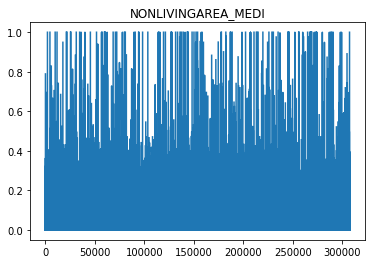

TOTALAREA_MODE
0.0000    582
0.0570    247
0.0547    230
0.0550    227
0.0548    227
0.0555    227
0.0551    225
0.0554    220
0.0573    220
0.0566    219
0.0556    217
0.0559    216
0.0543    214
0.0529    212
0.0603    211
0.0552    208
0.0541    205
0.0689    205
0.0525    204
0.0064    204
0.0067    203
0.0500    203
0.0502    201
0.0017    200
0.0688    199
0.0066    198
0.0526    198
0.0540    197
0.0536    196
0.0687    195
         ... 
0.4180      1
0.3623      1
0.4801      1
0.5693      1
0.4840      1
0.6800      1
0.8357      1
0.3621      1
0.3550      1
0.8712      1
0.9712      1
0.5925      1
0.6967      1
0.4124      1
0.4519      1
0.6006      1
0.5418      1
0.3082      1
0.6424      1
0.4538      1
0.4242      1
0.5391      1
0.6281      1
0.5044      1
0.8569      1
0.8362      1
0.5119      1
0.4823      1
0.3659      1
0.3500      1
Name: TOTALAREA_MODE, Length: 5116, dtype: int64


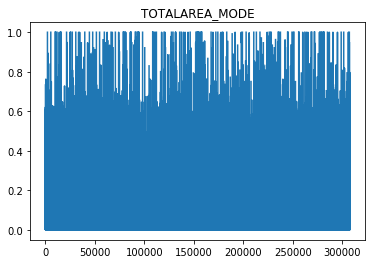

OBS_30_CNT_SOCIAL_CIRCLE
0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
28.0          1
348.0         1
29.0          1
47.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64


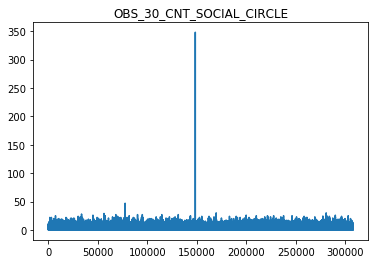

DEF_30_CNT_SOCIAL_CIRCLE
0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
8.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64


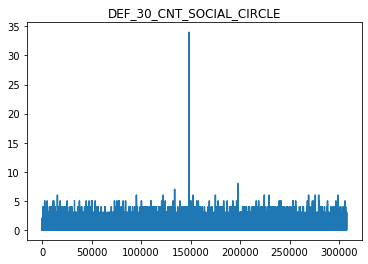

OBS_60_CNT_SOCIAL_CIRCLE
0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
344.0         1
47.0          1
26.0          1
30.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


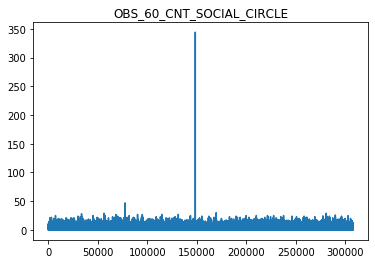

DEF_60_CNT_SOCIAL_CIRCLE
0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
24.0         1
7.0          1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64


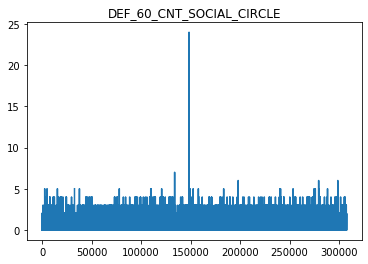

DAYS_LAST_PHONE_CHANGE
 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
-5.0         824
-6.0         537
-7.0         442
-8.0         278
-476.0       222
-352.0       213
-392.0       211
-364.0       209
-479.0       204
-329.0       203
-358.0       203
-293.0       202
-350.0       201
-399.0       200
-441.0       200
-404.0       199
-463.0       198
-9.0         198
-11.0        198
-301.0       197
-496.0       195
-362.0       195
-304.0       195
-483.0       195
-308.0       195
           ...  
-4018.0        1
-3622.0        1
-3603.0        1
-3866.0        1
-3605.0        1
-3390.0        1
-3818.0        1
-3607.0        1
-3861.0        1
-3723.0        1
-3703.0        1
-3781.0        1
-4051.0        1
-3580.0        1
-3633.0        1
-3592.0        1
-3857.0        1
-4118.0        1
-3783.0        1
-3466.0        1
-3949.0        1
-3764.0        1
-3620.0        1
-4292.0        1
-3747.0        1
-3558.0        1
-3978.0 

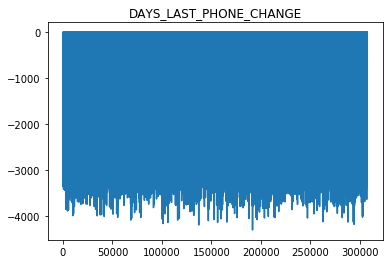

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64


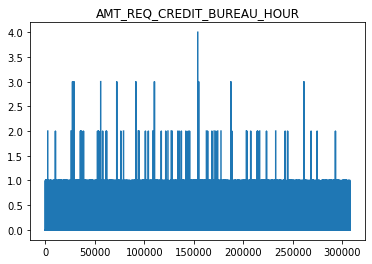

AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64


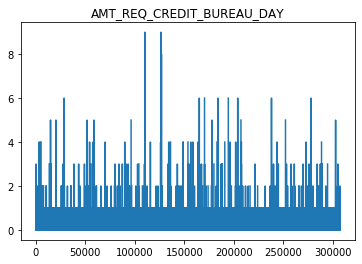

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64


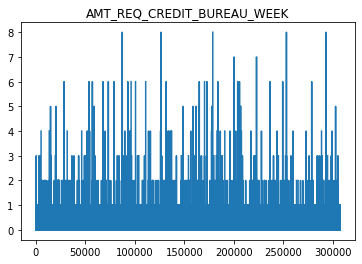

AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64


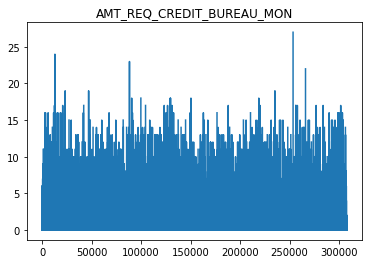

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64


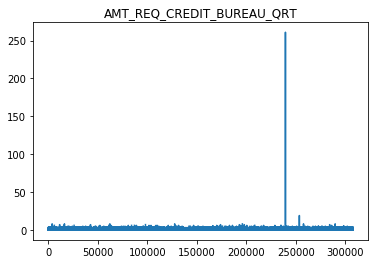

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64


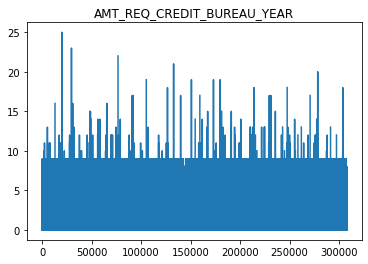

In [5]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
#dtype_select = ["float"]
#print(list(dtype_df_num["title"]))
app_train_num=app_train[list(dtype_df_num["title"])]
#print(app_train_num)
TF_num=[]
for i in app_train_num.columns:
    TF_num.append(len(app_train_num[i].unique())!=2)
#print(TF_num)
app_train_num_TF=app_train_num.columns[TF_num]
#print(app_train_num_TF)
app_train_num_nTF=app_train_num[app_train_num_TF]
#print(app_train_num_nTF)
data1=[]
for i in app_train_num_nTF:
    print(i)
    #data1.append(app_train_num_nTF[i])
    print(app_train_num_nTF[i].value_counts())
    plt.plot(list(app_train_num_nTF[i].index),app_train_num_nTF[i])
    plt.title(i)
    plt.show()
#for i in app_train_num_nTF.columns:
 #   app_train_num_nTF[i].plot(kind="bar",title="i")
#numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
#numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
#print("Numbers of remain columns" % len(numeric_columns))

# 檢視這些欄位的數值範圍
#for col in numeric_columns:
    #"""
    #Your CODE HERE, make the box plot
    #"""
    
#plt.show()

In [ ]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

In [6]:
print(app_train['AMT_INCOME_TOTAL'].describe())
print(app_train['REGION_POPULATION_RELATIVE'].describe())
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64
count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


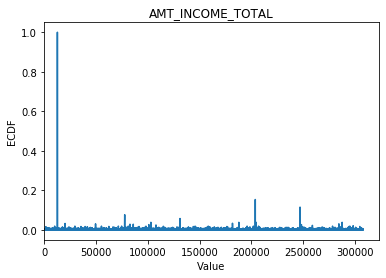

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


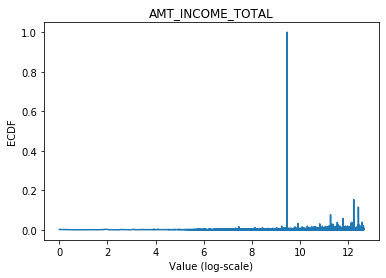

117000000.0      1
18000090.0       1
13500000.0       1
9000000.0        1
6750000.0        1
4500000.0        4
3950059.5        1
3825000.0        1
3600000.0        2
3375000.0        2
3150000.0        2
2930026.5        1
2700000.0        1
2475000.0        1
2250000.0       13
2214117.0        1
2160000.0        1
2070000.0        1
2025000.0        8
1935000.0        1
1890000.0        4
1800000.0       14
1755000.0        1
1665000.0        1
1575000.0       18
1530000.0        1
1440000.0        2
1417500.0        1
1381500.0        1
1358550.0        1
              ... 
32040.0          1
31990.5          1
31950.0          4
31860.0          1
31815.0          1
31531.5          1
31500.0        184
31050.0          1
30915.0          1
30600.0          6
30150.0          7
29700.0          3
29583.0          1
29250.0         32
29133.0          1
28800.0          3
28723.5          1
28593.0          1
28575.0          3
28404.0          1
28350.0         11
28161.0     

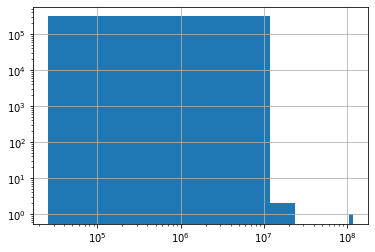

In [14]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())
#print(app_train['AMT_INCOME_TOTAL'].value_counts())
# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""

cdf = app_train['AMT_INCOME_TOTAL']
plt.plot(list(cdf.index), cdf/cdf.max())
plt.title("AMT_INCOME_TOTAL")
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')
plt.title("AMT_INCOME_TOTAL")
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

print(app_train['AMT_INCOME_TOTAL'].value_counts().sort_index(ascending=False))
app_train['AMT_INCOME_TOTAL'].hist()
plt.loglog()
plt.show()


## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


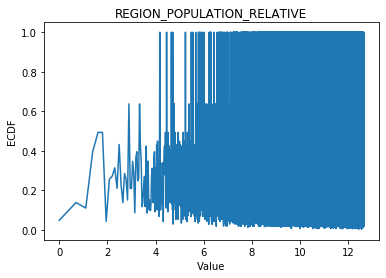

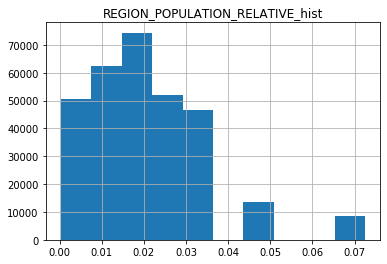

0.072508     8412
0.046220    13442
0.035792    16408
0.032561     6636
0.031329    11321
0.030755    12163
0.028663    11157
0.026392    11601
0.025164    11950
0.024610     6404
0.022800     3807
0.022625     6943
0.020713     8066
0.020246     7178
0.019689     6172
0.019101     8694
0.018850     7668
0.018801     6108
0.018634     7038
0.018209     6052
0.018029     6167
0.016612     4408
0.015221     6824
0.014520     4785
0.014464     3422
0.011703     3252
0.011657     3080
0.010966     3110
0.010643     3012
0.010556     2177
            ...  
0.007114     1684
0.007020     4105
0.006852     2435
0.006671     1653
0.006629     2818
0.006305     1672
0.006296     1225
0.006233     1087
0.006207     1936
0.006008     1796
0.005313     1218
0.005144      967
0.005084     1482
0.005002     1068
0.004960     3300
0.004849     1038
0.003818     1212
0.003813     1616
0.003541      627
0.003122     1147
0.003069     1783
0.002506      944
0.002134     1051
0.002042     1642
0.001417  

In [95]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = app_train['REGION_POPULATION_RELATIVE']


plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.title("REGION_POPULATION_RELATIVE")
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.title("REGION_POPULATION_RELATIVE_hist")
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts().sort_index(ascending = False)

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


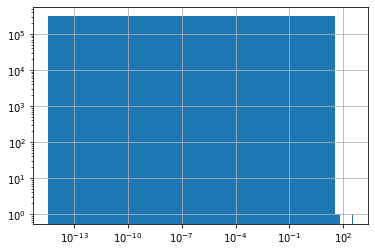

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [15]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here

cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
"""
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.loglog()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

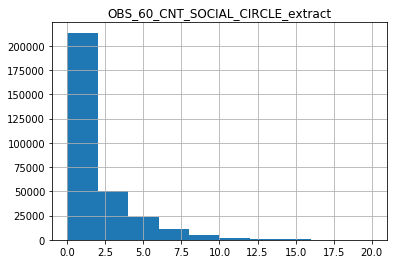

In [21]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
#loc_a = 
#loc_b = 

#app_train.loc[loc_a, loc_b].hist()
app_train[app_train['OBS_60_CNT_SOCIAL_CIRCLE']<21]['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.title('OBS_60_CNT_SOCIAL_CIRCLE_extract')
plt.show()